<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M1L3_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Augmentation**

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

In [2]:
rng = np.random.default_rng(seed=42)

In [3]:
# Loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalizing the data
train_X = train_X / 255
test_X = test_X / 255
train_X = train_X[::1200, :, :].copy()
train_y = train_y[::1200].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)

In [5]:
testpred = NN(train_X, train_y, test_X)
print("Baseline accuracy without augmentation:",
      Accuracy(test_y, testpred)*100, "%")

Baseline accuracy without augmentation: 64.72 %


# **Augmentation 1: Rotation**

In [6]:
def augRotate(sample, angleconstraint):
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample))
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)

In [7]:
# Hyperparameters
angleconstraint = 60
naugmentations = 5

In [8]:
angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)
for ii in range(len(angleconstraints)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )

    # Check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after rotation augmentation constrained by",
        angleconstraints[ii],
        "degrees is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )


Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 10 degrees is 66.91 %
Accuracy after rotation augmentation constrained by 20 degrees is 67.9 %
Accuracy after rotation augmentation constrained by 30 degrees is 67.77 %
Accuracy after rotation augmentation constrained by 40 degrees is 68.14 %
Accuracy after rotation augmentation constrained by 50 degrees is 67.69 %
Accuracy after rotation augmentation constrained by 60 degrees is 66.75 %
Accuracy after rotation augmentation constrained by 70 degrees is 66.62 %
Accuracy after rotation augmentation constrained by 80 degrees is 66.05 %
Accuracy after rotation augmentation constrained by 90 degrees is 64.44 %


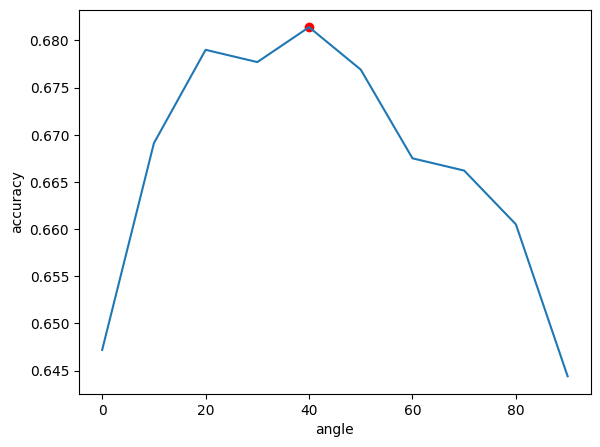

In [9]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# Plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c="red")

#**Augmentation 2: Shear**

In [10]:
def shear(sample, amount):
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)

    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img


In [11]:
def augShear(sample, shearconstraint):
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))
    amt = (amt - 0.5) * shearconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = shear(sample[ii], amt[ii])
    return np.squeeze(nsample)

In [12]:
shearconstraints = [
    0,
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
    1.8,
    2.0,
]
accuracies = np.zeros(
    len(shearconstraints), dtype=float
)

for ii in range(len(shearconstraints)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augShear(train_X, shearconstraints[ii]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )

    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after shear augmentation constrained by",
        shearconstraints[ii],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after shear augmentation constrained by 0 is 64.72 %
Accuracy after shear augmentation constrained by 0.2 is 62.96000000000001 %
Accuracy after shear augmentation constrained by 0.4 is 64.25999999999999 %
Accuracy after shear augmentation constrained by 0.6 is 65.92 %
Accuracy after shear augmentation constrained by 0.8 is 64.96 %
Accuracy after shear augmentation constrained by 1.0 is 65.13 %
Accuracy after shear augmentation constrained by 1.2 is 65.49000000000001 %
Accuracy after shear augmentation constrained by 1.4 is 64.02 %
Accuracy after shear augmentation constrained by 1.6 is 63.839999999999996 %
Accuracy after shear augmentation constrained by 1.8 is 60.42999999999999 %
Accuracy after shear augmentation constrained by 2.0 is 62.870000000000005 %


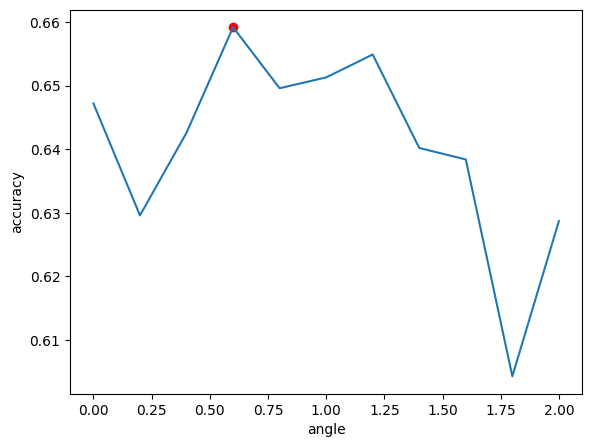

In [13]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# Plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c="red")

#**Augmentation 3: Rotation + Shear**

In [14]:
def augRotateShear(sample, angleconstraint, shearconstraint):
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))
    amt = (amt - 0.5) * shearconstraint
    angle = rng.random(len(sample))
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = rotate(
            shear(sample[ii], amt[ii]), angle[ii]
        )
    return np.squeeze(nsample)

In [15]:
shearconstraints = [
    0,
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
]
angleconstraints = [0, 10, 20, 30, 40, 50, 60]

hyp = cartesian((shearconstraints, angleconstraints))

accuracies = np.zeros(len(hyp), dtype=float)

for ii in range(len(hyp)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )

    # Check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after augmentation shear:",
        hyp[ii][0],
        "angle:",
        hyp[ii][1],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after augmentation shear: 0.0 angle: 0.0 is 63.32 %
Accuracy after augmentation shear: 0.0 angle: 10.0 is 61.419999999999995 %
Accuracy after augmentation shear: 0.0 angle: 20.0 is 63.54 %
Accuracy after augmentation shear: 0.0 angle: 30.0 is 61.47 %
Accuracy after augmentation shear: 0.0 angle: 40.0 is 63.89 %
Accuracy after augmentation shear: 0.0 angle: 50.0 is 61.9 %
Accuracy after augmentation shear: 0.0 angle: 60.0 is 62.129999999999995 %
Accuracy after augmentation shear: 0.2 angle: 0.0 is 63.39 %
Accuracy after augmentation shear: 0.2 angle: 10.0 is 62.61 %
Accuracy after augmentation shear: 0.2 angle: 20.0 is 59.0 %
Accuracy after augmentation shear: 0.2 angle: 30.0 is 62.53999999999999 %
Accuracy after augmentation shear: 0.2 angle: 40.0 is 61.050000000000004 %
Accuracy after augmentation shear: 0.2 angle: 50.0 is 61.96 %
Accuracy after augmentation shear: 0.2 angle: 60.0 is 63.51 %
Accuracy after augmentation shear: 0.4 angle: 0.0 is 63.38 %
Accuracy after augmentat

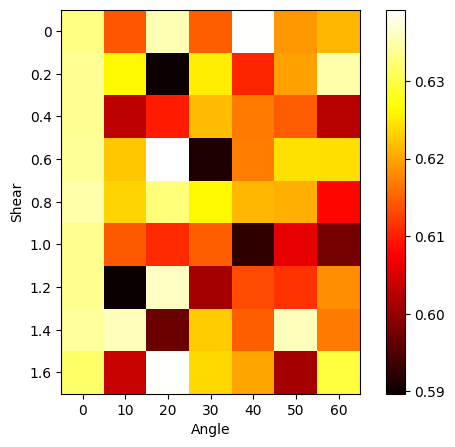

In [16]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(
    accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot"
)
ax.set_xlabel("Angle")
ax.set_ylabel("Shear")
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_xticklabels(angleconstraints)
ax.set_yticks(np.arange(len(shearconstraints)))
ax.set_yticklabels(shearconstraints)
plt.colorbar(im)

#**Questions**

**1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?**

Best value for angle constraint and shear constraint are 50 degrees and 0.6 respectively. The accuracy improved upto 3%.

**2. Can you increase the accuracy by increasing the number of augmentations from each sample?**

Yes, you can potentially improve the accuracy of a k-NN (k-Nearest Neighbor) model by increasing the number of augmentations from each sample.

**3. Try implementing a few augmentations of your own and experimenting with them.**

Accuracy after flip augmentation constrained by 0 is 64.72 %
Accuracy after flip augmentation constrained by 0.2 is 63.080000000000005 %
Accuracy after flip augmentation constrained by 0.4 is 62.38 %
Accuracy after flip augmentation constrained by 0.6 is 62.38 %
Accuracy after flip augmentation constrained by 0.8 is 62.38 %
Accuracy after flip augmentation constrained by 1.0 is 62.38 %


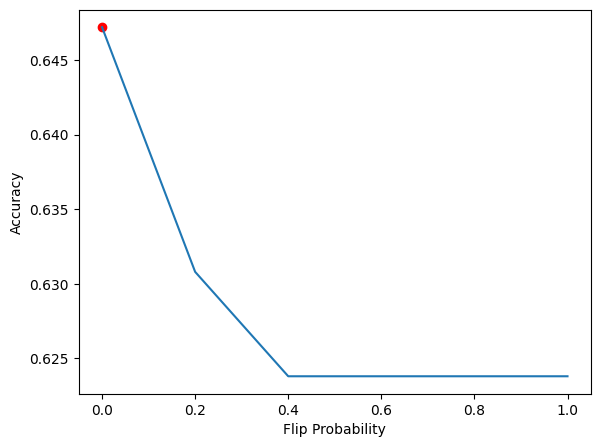

In [17]:
def flip_image(sample, flip_constraint):
    # If flip_constraint is 0, do not flip the image
    if flip_constraint == 0:
        return sample
    # Flip the image horizontally
    return np.flip(sample, axis=1)

def augFlip(sample, flipconstraint):
    if flipconstraint == 0:
        return sample

    nsample = sample.copy()  # Copy the original sample
    for ii in range(len(sample)):
        # Generate a random flip decision for each sample
        if rng.random() < flipconstraint:  # Flip based on the flip constraint
            nsample[ii] = flip_image(sample[ii], flipconstraint)

    return np.squeeze(nsample)  # Return the augmented sample

flipconstraints = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Probability of flipping the images

accuracies = np.zeros(len(flipconstraints), dtype=float)  # Store accuracy for each constraint

for ii in range(len(flipconstraints)):
    augdata = train_X  # Start with the original training data
    auglabel = train_y
    for jj in range(naugmentations):
        # Apply flip augmentation to the data
        augdata = np.concatenate(
            (augdata, augFlip(train_X, flipconstraints[ii]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )

    # Predict and compute accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)

    print(
        "Accuracy after flip augmentation constrained by",
        flipconstraints[ii],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot the variation of accuracy with flip constraints
ax.plot(flipconstraints, accuracies)
ax.set_xlabel("Flip Probability")
ax.set_ylabel("Accuracy")

# Plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(flipconstraints[maxind], accuracies[maxind], c="red")
plt.show()


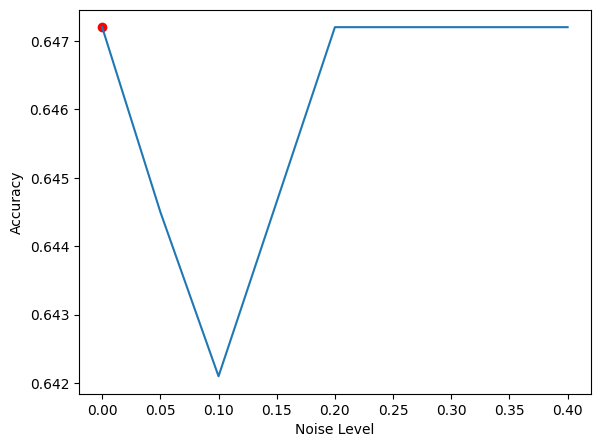

In [18]:
def add_noise(sample, noise_level):
    # Generate noise from a normal distribution
    noise = rng.normal(0, noise_level, sample.shape)
    # Add noise to the image
    noisy_sample = sample + noise
    # Clip the values to keep them between 0 and 1 (valid pixel range for normalized images)
    noisy_sample = np.clip(noisy_sample, 0, 1)
    return noisy_sample

def augNoise(sample, noiseconstraint):
    if noiseconstraint == 0:
        return sample  # If noiseconstraint is 0, no noise is added

    nsample = sample.copy()  # Copy the original sample
    for ii in range(len(sample)):
        # Add noise to each sample
        nsample[ii] = add_noise(sample[ii], noiseconstraint)

    return np.squeeze(nsample)  # Return the augmented sample

noiseconstraints = [0, 0.05, 0.1, 0.2, 0.3, 0.4]  # Different noise levels to experiment with

accuracies = np.zeros(len(noiseconstraints), dtype=float)  # Store accuracy for each constraint

for ii in range(len(noiseconstraints)):
    augdata = train_X  # Start with the original training data
    auglabel = train_y
    for jj in range(naugmentations):
        # Apply noise augmentation to the data
        augdata = np.concatenate(
            (augdata, augNoise(train_X, noiseconstraints[ii]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )

    # Predict and compute accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot the variation of accuracy with noise levels
ax.plot(noiseconstraints, accuracies)
ax.set_xlabel("Noise Level")
ax.set_ylabel("Accuracy")

# Plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(noiseconstraints[maxind], accuracies[maxind], c="red")
plt.show()



**4.Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?**

In [19]:
def augCombined(sample, shearconstraint, flipconstraint, noiseconstraint):
    # Apply shear augmentation
    sample = augShear(sample, shearconstraint)

    # Apply flip augmentation
    sample = augFlip(sample, flipconstraint)

    # Apply noise augmentation
    sample = augNoise(sample, noiseconstraint)

    return sample


In [20]:
shearconstraints = [0, 0.5, 1.0]
flipconstraints = [0, 1]
noiseconstraints = [0, 0.1, 0.2, 0.3]

dataset_sizes = [60000, 30000, 15000, 7500, 3750, 1875, 937]  # Reducing the dataset size

best_accuracy = 0
smallest_dataset = 0
naugmentations = 2  # Number of augmentations to apply

for size in dataset_sizes:
    # Take a subset of the training data based on the current size
    augdata = train_X[:size]
    auglabel = train_y[:size]

    for shearconstraint in shearconstraints:
        for flipconstraint in flipconstraints:
            for noiseconstraint in noiseconstraints:
                # Augment the data using the combined augmentation function
                for _ in range(naugmentations):
                    augdata = np.concatenate(
                        (augdata, augCombined(train_X[:size], shearconstraint, flipconstraint, noiseconstraint))
                    )
                    auglabel = np.concatenate(
                        (auglabel, train_y[:size])
                    )

                # Predict labels for the test data
                testpred = NN(augdata, auglabel, test_X)
                accuracy = Accuracy(test_y, testpred)

                # Check for best accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_combination = (size, shearconstraint, flipconstraint, noiseconstraint)

                # Check if accuracy is above 50% with smallest dataset
                if accuracy > 0.5 and smallest_dataset == 0:
                    smallest_dataset = size

                print(f"Dataset size: {size}, Shear: {shearconstraint}, Flip: {flipconstraint}, Noise: {noiseconstraint} - Accuracy: {accuracy * 100:.2f}%")

print(f"Highest accuracy: {best_accuracy * 100:.2f}% with dataset size {best_combination[0]}, Shear {best_combination[1]}, Flip {best_combination[2]}, Noise {best_combination[3]}")
print(f"Smallest dataset size to achieve >50% accuracy: {smallest_dataset}")


Dataset size: 60000, Shear: 0, Flip: 0, Noise: 0 - Accuracy: 64.72%
Dataset size: 60000, Shear: 0, Flip: 0, Noise: 0.1 - Accuracy: 64.48%
Dataset size: 60000, Shear: 0, Flip: 0, Noise: 0.2 - Accuracy: 64.44%
Dataset size: 60000, Shear: 0, Flip: 0, Noise: 0.3 - Accuracy: 64.44%
Dataset size: 60000, Shear: 0, Flip: 1, Noise: 0 - Accuracy: 62.58%
Dataset size: 60000, Shear: 0, Flip: 1, Noise: 0.1 - Accuracy: 61.99%
Dataset size: 60000, Shear: 0, Flip: 1, Noise: 0.2 - Accuracy: 61.99%
Dataset size: 60000, Shear: 0, Flip: 1, Noise: 0.3 - Accuracy: 61.99%
Dataset size: 60000, Shear: 0.5, Flip: 0, Noise: 0 - Accuracy: 63.78%
Dataset size: 60000, Shear: 0.5, Flip: 0, Noise: 0.1 - Accuracy: 64.05%
Dataset size: 60000, Shear: 0.5, Flip: 0, Noise: 0.2 - Accuracy: 64.24%
Dataset size: 60000, Shear: 0.5, Flip: 0, Noise: 0.3 - Accuracy: 64.24%
Dataset size: 60000, Shear: 0.5, Flip: 1, Noise: 0 - Accuracy: 63.30%
Dataset size: 60000, Shear: 0.5, Flip: 1, Noise: 0.1 - Accuracy: 63.16%
Dataset size: 60

Highest accuracy: 66.11% with dataset size 937, Shear 1.0, Flip 0, Noise 0.1
Smallest dataset size to achieve >50% accuracy: 60000


#**Exercise**

Try to take 50 images of each digit and calculate the performance on test set.

In [21]:
def select_50_per_digit(train_X, train_y):
    selected_X = []
    selected_y = []
    count = {i: 0 for i in range(10)}  # To keep track of selected images per digit

    for img, label in zip(train_X, train_y):
        if count[label] < 50:
            selected_X.append(img)
            selected_y.append(label)
            count[label] += 1
        if all(c == 50 for c in count.values()):  # Stop when we have 50 of each digit
            break

    return np.array(selected_X), np.array(selected_y)

# Select 50 images per digit
train_X_50, train_y_50 = select_50_per_digit(train_X, train_y)
print(f"Selected {len(train_X_50)} samples, with {len(np.unique(train_y_50))} unique labels.")


Selected 50 samples, with 10 unique labels.


In [22]:
train_X_50 = train_X_50 / 255.0
test_X = test_X / 255.0


In [23]:
# Predict the labels of the test data using the selected 50 samples per digit
testpred = NN(train_X_50, train_y_50, test_X)


In [24]:
# Calculate accuracy on the test set
accuracy_50_samples = Accuracy(test_y, testpred)
print(f"Accuracy with 50 samples per digit: {accuracy_50_samples * 100:.2f}%")


Accuracy with 50 samples per digit: 64.72%
